# Conférences Python Master TIDE #1

## Librairie pandas

Dataset des communes françaises : `correspondance-code-insee-code-postal.csv`

0) Import
- Importer la librairie pandas
- Utiliser les options suivantes
```python
pd.set_option("display.min_rows", 16)
plt.style.use('seaborn-darkgrid')
```

1) Charger le fichier CSV
- Uniquement les 11 première colonnes
- Utiliser la colonne "Code INSEE" comme index
- Trier selon l'index

2) Questions
- Combien y a-t-il de départements ?
- Quelle commune est la plus haute ?
- Quelle commune est la plus peuplée ?
- Quelle commune a le nom le plus court ?
- Quelle commune a le nom le plus long ?
- Quel est le nom de commune le plus fréquent ?
- Ecrire une fonction qui recherche les communes se terminant par un motif du type "-mot1-mot2" (par exemple "-SUR-MER")
```python
def selection(mot1, mot2):
    pass
```
- Quelles villes contiennent deux "Z" (accolés, séparés par une seule lettre, séparés par un nombre quelconque de lettres, séparés par au moins une lettre) ?
- Quelles sont les dix terminaisons des noms de communes du type "-mot1-mot2" les plus fréquentes ?

3) Transformations
- Passer la colonne "Superficie" en km²
- Passer la colonne "Altitude Moyenne" en entiers
- Modifier la colonne "Statut" en categorie ordonnée

4) Géographie
- Créer une colonne "CP Ville" à partir du code postal et du nom de chaque commune
- Extraire la latitude et la longitude de la colonne "geo_point_2d"
- Ecrire une fonction qui retourne le "CP Ville" de la commune la plus proche d'une latitude et d'une longitude
```python
def ville(lat, long):
    pass
```
- Ecrire une fonction qui transforme des coordonnées GPS (en degrés, minutes et secondes) en coordonnées décimales
```python
def gps2dec(deg, mn, sec):
    pass
```
- Choisir une petite commune française sur Wikipedia et vérifier qu'elle est trouvée à partir de ces coordonnnées GPS en utilisant les 2 fonctions définies

5) Géométrie
- Décoder les données JSON de la colonne "geo_shape"
- Donner le décompte des différentes valeurs associées à la clé "type"
- Donner le décompte des longueurs des listes associées à la clé "coordinates"
- Quelles sont les "CP Ville" des communes de type "Polygone" et dont la longueur des listes accédées avec la clé "coordinates" vaut 2 ?

6) Graphiques
- Afficher un histogramme avec les longueurs des noms des communes
- Afficher un graphique de type scatterplot à partir des coordonnées des communes
- Trouver une condition pour limiter le dataset à la France métropolitaine et afficher un graphique
- Mettre toutes les communes à moins de 1000m en bleu et celle à plus de 1000m en rouge
- Afficher un graphique de type scatterplot dans lequel les communes se terminant par un motif du type "-mot1-mot2" sont mis dans une autre couleur
- Afficher un graphique de type scatterplot dans lequel la couleur utilisée dépend de la colonne "Altitude moyenne" selon la colormap "Spectral_r"
- Afficher une carte de France métropolitaine avec les préfectures de région et leur nom, en corrigeant celles qui sont des arrondissements de Paris, Lyon ou Marseille.

&copy; Francis Wolinski 2023

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.min_rows", 16)
plt.style.use('seaborn-v0_8-darkgrid')

In [7]:
df = (pd
      .read_csv("data/correspondance-code-insee-code-postal.csv",
                sep=";",
                index_col="Code INSEE",
                usecols=range(11)
                )
      .sort_index()
     )

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36742 entries, 01001 to 97617
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code Postal       36742 non-null  object 
 1   Commune           36742 non-null  object 
 2   Département       36742 non-null  object 
 3   Région            36742 non-null  object 
 4   Statut            36742 non-null  object 
 5   Altitude Moyenne  36742 non-null  float64
 6   Superficie        36742 non-null  float64
 7   Population        36742 non-null  float64
 8   geo_point_2d      36742 non-null  object 
 9   geo_shape         36742 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [8]:
df.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Code INSEE,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273..."
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089..."
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190..."
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580..."
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854..."


In [11]:
[i*i for i in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [12]:
[i*i for i in range(10) if i % 2 == 1]

[1, 9, 25, 49, 81]

In [13]:
zip([1, 2, 3], ["a", "b", "c"])

In [14]:
list(zip([1, 2, 3], ["a", "b", "c"]))

[(1, 'a'), (2, 'b'), (3, 'c')]

In [19]:
%%time
for x in range(100000):
    [f"{j}-{i}" for i, j in zip([1, 2, 3], ["a", "b", "c"])]

CPU times: total: 250 ms
Wall time: 243 ms


In [20]:
%%time
for x in range(100000):
    result = []
    for i, j in zip([1, 2, 3], ["a", "b", "c"]):
        result.append(f"{j}-{i}")

CPU times: total: 281 ms
Wall time: 295 ms


In [9]:
var = pd.read_html("https://fr.wikipedia.org/wiki/Liste_des_pays_par_PIB_nominal")

[x.shape for x in var]

[(3, 3), (113, 5), (195, 3), (211, 3), (212, 3), (14, 2), (4, 2), (6, 2)]

In [10]:
var[2]

,Rang,Pays ou territoire,PIB (en milliards de dollars/an)
0,1,États-Unis,"20 494,05"
1,-,"Union européenne[1],[note 1]","18 750,05"
2,2,Chine[note 2],"13 407,40"
3,3,Japon,"4 971,93"
4,4,Allemagne,"4 000,39"
5,5,Royaume-Uni,"2 828,64"
6,6,France,"2 775,25"
7,7,Inde,"2 716,75"
...,...,...,...
187,187,Tonga,0470


In [22]:
df["Département"].nunique()

101

In [23]:
df.loc[df["Altitude Moyenne"].idxmax()]

Code Postal                                                     73480
Commune                                              BONNEVAL-SUR-ARC
Département                                                    SAVOIE
Région                                                    RHONE-ALPES
Statut                                                 Commune simple
Altitude Moyenne                                               2713.0
Superficie                                                    11231.0
Population                                                        0.2
geo_point_2d                             45.3858269371, 7.09178979521
geo_shape           {"type": "Polygon", "coordinates": [[[7.110695...
Name: 73047, dtype: object

In [24]:
df.loc[df["Altitude Moyenne"]==df["Altitude Moyenne"].max()]

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Code INSEE,,,,,,,,,,
73047,73480,BONNEVAL-SUR-ARC,SAVOIE,RHONE-ALPES,Commune simple,2713.0,11231.0,0.2,"45.3858269371, 7.09178979521","{""type"": ""Polygon"", ""coordinates"": [[[7.110695..."


In [25]:
df.loc[df["Altitude Moyenne"].idxmax(), "Commune"]

'BONNEVAL-SUR-ARC'

In [28]:
%timeit df["Commune"].apply(len)

20.3 ms ± 433 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
%timeit df["Commune"].str.len()

24.2 ms ± 290 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [30]:
df.loc[df["Commune"].str.len().idxmax(), "Commune"]

'SAINT-REMY-EN-BOUZEMONT-SAINT-GENEST-ET-ISSON'

In [31]:
df.loc[df["Commune"].str.len().idxmin(), "Commune"]

'Y'

In [32]:
len(df)

36742

In [33]:
df["Commune"].nunique()

34130

In [35]:
df["Commune"].value_counts().idxmax()

'SAINTE-COLOMBE'

In [47]:
df["Commune"].value_counts().index[0]

'SAINTE-COLOMBE'

In [49]:
df["Commune"].mode()[0]

'SAINTE-COLOMBE'

In [51]:
df["Commune"].describe()['top']

'SAINTE-COLOMBE'

In [36]:
df["Commune"].value_counts()#.idxmax()

SAINTE-COLOMBE             14
SAINT-SAUVEUR              12
SAINTE-MARIE               11
BEAULIEU                   11
SAINT-SULPICE              10
SAINT-REMY                 10
SAINT-AUBIN                10
LE PIN                     10
                           ..
SAUVETERRE-DE-COMMINGES     1
SAUSSENS                    1
SAUBENS                     1
SARREMEZAN                  1
SARRECAVE                   1
SANA                        1
SAMOUILLAN                  1
TSINGONI                    1
Name: Commune, Length: 34130, dtype: int64

In [41]:
df.select_dtypes(include='number').idxmax()

Altitude Moyenne    73047
Superficie          97353
Population          31555
dtype: object

In [44]:
df.nunique()

Code Postal          6101
Commune             34130
Département           101
Région                 27
Statut                  6
Altitude Moyenne     1652
Superficie           5246
Population            509
geo_point_2d        36742
geo_shape           36742
dtype: int64

In [52]:
mot1 = "SUR"
mot2 = "MER"
df.loc[df["Commune"].str.endswith(f"{mot1}-{mot2}")]

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Code INSEE,,,,,,,,,,
06011,06310,BEAULIEU-SUR-MER,ALPES-MARITIMES,PROVENCE-ALPES-COTE D'AZUR,Commune simple,36.0,108.0,3.7,"43.7079039397, 7.33256934881","{""type"": ""Polygon"", ""coordinates"": [[[7.326789..."
06027,06800,CAGNES-SUR-MER,ALPES-MARITIMES,PROVENCE-ALPES-COTE D'AZUR,Chef-lieu canton,64.0,1821.0,48.0,"43.6715162078, 7.15275703379","{""type"": ""Polygon"", ""coordinates"": [[[7.145493..."
06138,06590,THEOULE-SUR-MER,ALPES-MARITIMES,PROVENCE-ALPES-COTE D'AZUR,Commune simple,130.0,1072.0,1.6,"43.4985345439, 6.92965248383","{""type"": ""Polygon"", ""coordinates"": [[[6.933726..."
06159,06230,VILLEFRANCHE-SUR-MER,ALPES-MARITIMES,PROVENCE-ALPES-COTE D'AZUR,Chef-lieu canton,231.0,492.0,5.8,"43.7122153121, 7.32225410533","{""type"": ""Polygon"", ""coordinates"": [[[7.308745..."
13039,13270,FOS-SUR-MER,BOUCHES-DU-RHONE,PROVENCE-ALPES-COTE D'AZUR,Commune simple,5.0,8868.0,15.5,"43.4556812107, 4.90452133912","{""type"": ""Polygon"", ""coordinates"": [[[4.972215..."
14059,14910,BENERVILLE-SUR-MER,CALVADOS,BASSE-NORMANDIE,Commune simple,45.0,309.0,0.5,"49.3390106956, 0.0477938566692","{""type"": ""Polygon"", ""coordinates"": [[[0.045946..."
14062,14440,BENY-SUR-MER,CALVADOS,BASSE-NORMANDIE,Commune simple,51.0,680.0,0.3,"49.2906537032, -0.436236066881","{""type"": ""Polygon"", ""coordinates"": [[[-0.44340..."
14066,14990,BERNIERES-SUR-MER,CALVADOS,BASSE-NORMANDIE,Commune simple,22.0,766.0,2.4,"49.3194698748, -0.417743184424","{""type"": ""Polygon"", ""coordinates"": [[[-0.41191..."
...,...,...,...,...,...,...,...,...,...,...


In [53]:
def selection(mot1, mot2):
    return df.loc[df["Commune"].str.endswith(f"{mot1}-{mot2}")]

In [54]:
selection("SOUS", "BOIS")

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Code INSEE,,,,,,,,,,
10136,10110,EGUILLY-SOUS-BOIS,AUBE,CHAMPAGNE-ARDENNE,Commune simple,273.0,1015.0,0.1,"48.1388297838, 4.53815136871","{""type"": ""Polygon"", ""coordinates"": [[[4.562265..."
26335,26770,SALLES-SOUS-BOIS,DROME,RHONE-ALPES,Commune simple,357.0,968.0,0.2,"44.4707924508, 4.94008224904","{""type"": ""Polygon"", ""coordinates"": [[[4.947248..."
57128,57220,CHARLEVILLE-SOUS-BOIS,MOSELLE,LORRAINE,Commune simple,263.0,1278.0,0.3,"49.1959515116, 6.4063041025","{""type"": ""Polygon"", ""coordinates"": [[[6.406500..."
60052,60640,BEAUGIES-SOUS-BOIS,OISE,PICARDIE,Commune simple,104.0,388.0,0.1,"49.6372067347, 3.09986657497","{""type"": ""Polygon"", ""coordinates"": [[[3.096578..."
62762,62650,SAINT-MICHEL-SOUS-BOIS,PAS-DE-CALAIS,NORD-PAS-DE-CALAIS,Commune simple,137.0,567.0,0.1,"50.5174881258, 1.93606986972","{""type"": ""Polygon"", ""coordinates"": [[[1.929739..."
78165,78340,LES CLAYES-SOUS-BOIS,YVELINES,ILE-DE-FRANCE,Commune simple,140.0,609.0,17.5,"48.8186406601, 1.9840595554","{""type"": ""Polygon"", ""coordinates"": [[[1.994386..."
89020,89660,ASNIERES-SOUS-BOIS,YONNE,BOURGOGNE,Commune simple,229.0,1812.0,0.2,"47.4789567606, 3.63907394341","{""type"": ""Polygon"", ""coordinates"": [[[3.628685..."
93005,93600,AULNAY-SOUS-BOIS,SEINE-SAINT-DENIS,ILE-DE-FRANCE,Chef-lieu canton,54.0,1614.0,82.5,"48.9458384367, 2.49329041687","{""type"": ""Polygon"", ""coordinates"": [[[2.491733..."
93014,93390,CLICHY-SOUS-BOIS,SEINE-SAINT-DENIS,ILE-DE-FRANCE,Commune simple,103.0,395.0,30.0,"48.9076285106, 2.5462022266","{""type"": ""Polygon"", ""coordinates"": [[[2.532098..."


In [57]:
df.loc[df["Commune"].str.contains("ZZ"), "Commune"].sort_values().values

array(['AZZANA', 'BERGHOLTZZELL', 'COZZANO', 'FOZZANO', 'LINGUIZZETTA',
       'LOZZI', 'LUGO-DI-NAZZA', 'MAZZOLA', "MONACIA-D'OREZZA",
       'PIAZZALI', 'PIAZZOLE', "PIE-D'OREZZA", 'POGGIO-DI-NAZZA',
       'POGGIO-MEZZANA', 'REZZA', 'STAZZONA', "VALLE-D'OREZZA",
       'VALLE-DI-MEZZANA', 'VEZZANI'], dtype=object)

In [59]:
var = df.loc[df["Commune"].str.contains("ZZ"), "Commune"].values
var.sort()
var

array(['AZZANA', 'BERGHOLTZZELL', 'COZZANO', 'FOZZANO', 'LINGUIZZETTA',
       'LOZZI', 'LUGO-DI-NAZZA', 'MAZZOLA', "MONACIA-D'OREZZA",
       'PIAZZALI', 'PIAZZOLE', "PIE-D'OREZZA", 'POGGIO-DI-NAZZA',
       'POGGIO-MEZZANA', 'REZZA', 'STAZZONA', "VALLE-D'OREZZA",
       'VALLE-DI-MEZZANA', 'VEZZANI'], dtype=object)

In [60]:
df.loc[df["Commune"].str.contains("Z.Z"), "Commune"].sort_values().values

array(['DEZIZE-LES-MARANGES', 'VEZEZOUX', 'ZOZA'], dtype=object)

In [61]:
df.loc[df["Commune"].str.contains("Z..Z"), "Commune"].sort_values().values

array(['CIREY-SUR-VEZOUZE', 'DOMEVRE-SUR-VEZOUZE', 'GEZ-EZ-ANGLES',
       'INZINZAC-LOCHRIST', 'OBERMODERN-ZUTZENDORF', 'ZONZA'],
      dtype=object)

In [62]:
df.loc[df["Commune"].str.contains("Z.*Z"), "Commune"].sort_values().values

array(['ALLEZ-ET-CAZENEUVE', 'ARCIZAC-EZ-ANGLES', 'ARZACQ-ARRAZIGUET',
       'AZANNES-ET-SOUMAZANNES', 'AZILONE-AMPAZA', 'AZZANA',
       'BAZOCHES-SUR-LE-BETZ', 'BELVEZE-DU-RAZES', 'BERGHOLTZZELL',
       'BEUZEC-CAP-SIZUN', 'CAZOULS-LES-BEZIERS', "CHAZAY-D'AZERGUES",
       'CIREY-SUR-VEZOUZE', 'COZZANO', 'DAUMAZAN-SUR-ARIZE',
       'DEZIZE-LES-MARANGES', 'DOMEVRE-SUR-VEZOUZE', 'DZAOUDZI',
       'ERIZE-SAINT-DIZIER', 'FLEZ-CUZY', 'FOZZANO', 'GEZ-EZ-ANGLES',
       'GOUZANGREZ', 'INZINZAC-LOCHRIST', "JUZET-D'IZAUT",
       'LEZAT-SUR-LEZE', 'LIMETZ-VILLEZ', 'LINGUIZZETTA', 'LOZZI',
       'LUGO-DI-NAZZA', 'MAIZIERES-LES-METZ', 'MAZERAT-AUROUZE',
       'MAZERES-LEZONS', 'MAZEROLLES-DU-RAZES', 'MAZZOLA',
       'MEZIERES-LEZ-CLERY', "MONACIA-D'OREZZA", 'MONTPEZAT-SOUS-BAUZON',
       'OBERMODERN-ZUTZENDORF', 'OUZOUER-SUR-TREZEE', 'PIAZZALI',
       'PIAZZOLE', "PIE-D'OREZZA", 'PLONEVEZ-PORZAY', 'POGGIO-DI-NAZZA',
       'POGGIO-MEZZANA', 'REZZA', 'ROZIER-EN-DONZY',
       'ROZIERES-

In [63]:
df.loc[df["Commune"].str.contains("Z.+Z"), "Commune"].sort_values().values

array(['ALLEZ-ET-CAZENEUVE', 'ARCIZAC-EZ-ANGLES', 'ARZACQ-ARRAZIGUET',
       'AZANNES-ET-SOUMAZANNES', 'AZILONE-AMPAZA', 'BAZOCHES-SUR-LE-BETZ',
       'BELVEZE-DU-RAZES', 'BEUZEC-CAP-SIZUN', 'CAZOULS-LES-BEZIERS',
       "CHAZAY-D'AZERGUES", 'CIREY-SUR-VEZOUZE', 'DAUMAZAN-SUR-ARIZE',
       'DEZIZE-LES-MARANGES', 'DOMEVRE-SUR-VEZOUZE', 'DZAOUDZI',
       'ERIZE-SAINT-DIZIER', 'FLEZ-CUZY', 'GEZ-EZ-ANGLES', 'GOUZANGREZ',
       'INZINZAC-LOCHRIST', "JUZET-D'IZAUT", 'LEZAT-SUR-LEZE',
       'LIMETZ-VILLEZ', 'MAIZIERES-LES-METZ', 'MAZERAT-AUROUZE',
       'MAZERES-LEZONS', 'MAZEROLLES-DU-RAZES', 'MEZIERES-LEZ-CLERY',
       'MONTPEZAT-SOUS-BAUZON', 'OBERMODERN-ZUTZENDORF',
       'OUZOUER-SUR-TREZEE', 'PLONEVEZ-PORZAY', 'ROZIER-EN-DONZY',
       'ROZIERES-SUR-MOUZON', 'SAINT-NAZAIRE-DE-LADAREZ',
       'SAINT-NAZAIRE-DE-PEZAN', "SAINT-NIZIER-D'AZERGUES", 'TAIZE-AIZIE',
       'THEZAN-LES-BEZIERS', 'TOURZEL-RONZIERES', 'VEZEZOUX',
       'VEZINS-DE-LEVEZOU', 'VILLARZEL-DU-RAZES', 'VIUZ-EN

In [65]:
df["Commune"].str[:3]

Code INSEE
01001    L'A
01002    L'A
01004    AMB
01005    AMB
01006    AMB
01007    AMB
01008    AMB
01009    AND
        ... 
97610    KOU
97611    MAM
97612    MTS
97613    M'T
97614    OUA
97615    PAM
97616    SAD
97617    TSI
Name: Commune, Length: 36742, dtype: object

In [69]:
df["Commune"].str.split("-").str[-2:]

Code INSEE
01001    [L'ABERGEMENT, CLEMENCIAT]
01002                   [DE, VAREY]
01004                   [EN, BUGEY]
01005                  [EN, DOMBES]
01006                     [AMBLEON]
01007                    [AMBRONAY]
01008                    [AMBUTRIX]
01009                  [ET, CONDON]
                    ...            
97610                     [KOUNGOU]
97611                   [MAMOUDZOU]
97612                   [MTSAMBORO]
97613               [M'TSANGAMOUJI]
97614                    [OUANGANI]
97615                    [PAMANDZI]
97616                        [SADA]
97617                    [TSINGONI]
Name: Commune, Length: 36742, dtype: object

In [75]:
(df["Commune"]
 .str
 .extract("(-.*-.*)$", expand=False)
 .dropna()
 .value_counts()
 .head(10)
)

-SUR-MER         88
-SUR-SEINE       67
-SUR-MARNE       55
-LES-BAINS       53
-LE-CHATEAU      52
-SUR-LOIRE       52
-LE-SEC          45
-LE-GRAND        43
-SUR-MEUSE       42
-SAINT-MARTIN    41
Name: Commune, dtype: int64

In [84]:
(df["Commune"]
 .str
 .extract("(.*)-(.*)$")
 .dropna()
)

,0,1
Code INSEE,,
01001,L'ABERGEMENT,CLEMENCIAT
01002,L'ABERGEMENT-DE,VAREY
01004,AMBERIEU-EN,BUGEY
01005,AMBERIEUX-EN,DOMBES
01009,ANDERT-ET,CONDON
01021,ARS-SUR,FORMANS
01023,ASNIERES-SUR,SAONE
01025,BAGE-LA,VILLE
...,...,...


In [76]:
"\t"

'\t'

In [77]:
r"\t"

'\\t'

In [86]:
df["Superficie"] /= 100
df["Altitude Moyenne"] = df["Altitude Moyenne"].astype(int)
df.head(1).T

Code INSEE,01001
Code Postal,01400
Commune,L'ABERGEMENT-CLEMENCIAT
Département,AIN
Région,RHONE-ALPES
Statut,Commune simple
Altitude Moyenne,242
Superficie,15.65
Population,0.8
geo_point_2d,"46.1534255214, 4.92611354223"
geo_shape,"{""type"": ""Polygon"", ""coordinates"": [[[4.926273..."


In [88]:
df["Statut"].unique()

array(['Commune simple', 'Chef-lieu canton', 'Sous-préfecture',
       'Préfecture', 'Préfecture de région', "Capitale d'état"],
      dtype=object)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36742 entries, 01001 to 97617
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code Postal       36742 non-null  object 
 1   Commune           36742 non-null  object 
 2   Département       36742 non-null  object 
 3   Région            36742 non-null  object 
 4   Statut            36742 non-null  object 
 5   Altitude Moyenne  36742 non-null  int32  
 6   Superficie        36742 non-null  float64
 7   Population        36742 non-null  float64
 8   geo_point_2d      36742 non-null  object 
 9   geo_shape         36742 non-null  object 
dtypes: float64(2), int32(1), object(7)
memory usage: 4.0+ MB


In [92]:
cat_statut = pd.CategoricalDtype(categories=['Commune simple', 'Chef-lieu canton', 'Sous-préfecture', 'Préfecture', 'Préfecture de région', "Capitale d'état"],
                                 ordered=True)
df["Statut"] = df["Statut"].astype(cat_statut)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36742 entries, 01001 to 97617
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Code Postal       36742 non-null  object  
 1   Commune           36742 non-null  object  
 2   Département       36742 non-null  object  
 3   Région            36742 non-null  object  
 4   Statut            36742 non-null  category
 5   Altitude Moyenne  36742 non-null  int32   
 6   Superficie        36742 non-null  float64 
 7   Population        36742 non-null  float64 
 8   geo_point_2d      36742 non-null  object  
 9   geo_shape         36742 non-null  object  
dtypes: category(1), float64(2), int32(1), object(6)
memory usage: 3.7+ MB


In [95]:
df["Statut"].cat.codes

Code INSEE
01001    0
01002    0
01004    1
01005    0
01006    0
01007    0
01008    0
01009    0
        ..
97610    1
97611    2
97612    1
97613    1
97614    1
97615    1
97616    1
97617    1
Length: 36742, dtype: int8

In [97]:
df["Densité"] = df["Population"] / df["Superficie"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36742 entries, 01001 to 97617
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Code Postal       36742 non-null  object  
 1   Commune           36742 non-null  object  
 2   Département       36742 non-null  object  
 3   Région            36742 non-null  object  
 4   Statut            36742 non-null  category
 5   Altitude Moyenne  36742 non-null  int32   
 6   Superficie        36742 non-null  float64 
 7   Population        36742 non-null  float64 
 8   geo_point_2d      36742 non-null  object  
 9   geo_shape         36742 non-null  object  
 10  Densité           36742 non-null  float64 
dtypes: category(1), float64(3), int32(1), object(6)
memory usage: 4.0+ MB


In [100]:
%%time
df["CP Ville"] = df["Code Postal"] + " " + df["Commune"]

CPU times: total: 31.2 ms
Wall time: 20.7 ms


In [101]:
%%time
df["Code Postal"].combine(df["Commune"], lambda x, y: f"{x} {y}")

CPU times: total: 906 ms
Wall time: 941 ms


Code INSEE
01001    01400 L'ABERGEMENT-CLEMENCIAT
01002      01640 L'ABERGEMENT-DE-VAREY
01004          01500 AMBERIEU-EN-BUGEY
01005        01330 AMBERIEUX-EN-DOMBES
01006                    01300 AMBLEON
01007                   01500 AMBRONAY
01008                   01500 AMBUTRIX
01009           01300 ANDERT-ET-CONDON
                     ...              
97610                    97600 KOUNGOU
97611                  97600 MAMOUDZOU
97612                  97630 MTSAMBORO
97613              97650 M'TSANGAMOUJI
97614                   97670 OUANGANI
97615                   97610 PAMANDZI
97616                       97640 SADA
97617                   97680 TSINGONI
Length: 36742, dtype: object

In [103]:
df["geo_point_2d"][0]

'46.1534255214, 4.92611354223'

In [108]:
df["Latitude"] = df["geo_point_2d"].str.split(", ").str[0].astype(float)
df["Longitude"] = df["geo_point_2d"].str.split(", ").str[1].astype(float)

In [111]:
df[["Latitude", "Longitude"]] = df["geo_point_2d"].str.extract("(.*), (.*)").astype(float)

In [116]:
df["geo_point_2d"].str.extract("(.*)\.(.*), (.*)\.(.*)")

,0,1,2,3
Code INSEE,,,,
01001,46,1534255214,4,92611354223
01002,46,0091878776,5,42801696363
01004,45,9608475114,5,3729257777
01005,45,9961799872,4,91227250796
01006,45,7494989044,5,59432017366
01007,46,0055913782,5,35760660735
01008,45,9367134524,5,3328092349
01009,45,7873565333,5,65788307924
...,...,...,...,...


In [118]:
pd.concat([df, df["geo_point_2d"].str.extract("(?P<lat>.*), (?P<long>.*)")], axis=1).head(3)

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Densité,CP Ville,Latitude,Longitude,lat,long
Code INSEE,,,,,,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242,15.65,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",0.051118,01400 L'ABERGEMENT-CLEMENCIAT,46.153426,4.926114,46.1534255214,4.92611354223
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483,9.12,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",0.021930,01640 L'ABERGEMENT-DE-VAREY,46.009188,5.428017,46.0091878776,5.42801696363
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379,24.48,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",0.547386,01500 AMBERIEU-EN-BUGEY,45.960848,5.372926,45.9608475114,5.3729257777


In [119]:
df[["Commune", "Département"]]

,Commune,Département
Code INSEE,,
01001,L'ABERGEMENT-CLEMENCIAT,AIN
01002,L'ABERGEMENT-DE-VAREY,AIN
01004,AMBERIEU-EN-BUGEY,AIN
01005,AMBERIEUX-EN-DOMBES,AIN
01006,AMBLEON,AIN
01007,AMBRONAY,AIN
01008,AMBUTRIX,AIN
01009,ANDERT-ET-CONDON,AIN
...,...,...


In [120]:
import numpy as np

def ville(lat, long):
    dist = np.sqrt((df["Latitude"] - lat)**2 + (df["Longitude"] - long)**2)
    return df.loc[dist.idxmin(), "CP Ville"]

ville(48, 2)

'45470 REBRECHIEN'

In [124]:
def ville2(lat, long):
    dist2 = (df["Latitude"] - lat)**2 + (df["Longitude"] - long)**2
    return df.loc[dist2.idxmin(), "CP Ville"]

In [121]:
def gps2dec(deg, mn, sec):
    return deg + mn/60 + sec/3600

In [122]:
# 43° 49′ 24″ nord, 7° 11′ 34″ est
ville(gps2dec(43, 49, 24), gps2dec(7, 11, 34))

'06670 SAINT-MARTIN-DU-VAR'

In [125]:
# 49° 48′ 14″ nord, 2° 59′ 34″ est
ville(gps2dec(49, 48, 14), gps2dec(2, 59, 34))

'80190 Y'

In [134]:
df["geo_shape"]

Code INSEE
01001    {"type": "Polygon", "coordinates": [[[4.926273...
01002    {"type": "Polygon", "coordinates": [[[5.430089...
01004    {"type": "Polygon", "coordinates": [[[5.386190...
01005    {"type": "Polygon", "coordinates": [[[4.895580...
01006    {"type": "Polygon", "coordinates": [[[5.614854...
01007    {"type": "Polygon", "coordinates": [[[5.413533...
01008    {"type": "Polygon", "coordinates": [[[5.321986...
01009    {"type": "Polygon", "coordinates": [[[5.656393...
                               ...                        
97610    {"type": "Polygon", "coordinates": [[[45.23692...
97611    {"type": "Polygon", "coordinates": [[[45.19781...
97612    {"type": "MultiPolygon", "coordinates": [[[[45...
97613    {"type": "Polygon", "coordinates": [[[45.10168...
97614    {"type": "Polygon", "coordinates": [[[45.15401...
97615    {"type": "Polygon", "coordinates": [[[45.29645...
97616    {"type": "Polygon", "coordinates": [[[45.13226...
97617    {"type": "Polygon", "coordinates": [

In [127]:
df["geo_shape"][0]

'{"type": "Polygon", "coordinates": [[[4.92627342692396, 46.1200517234555], [4.92199538031264, 46.12069170563269], [4.921996260482057, 46.12663667307488], [4.90936269187648, 46.129164756530656], [4.916016986429157, 46.14461766984426], [4.903080786126749, 46.157977074275074], [4.904571300671208, 46.16096059498421], [4.910603091203733, 46.180432597608316], [4.914119126867876, 46.18271538441311], [4.932895432675545, 46.18304616431434], [4.938729478686701, 46.17383114520867], [4.933038591703602, 46.16429901579509], [4.958286230120842, 46.153246666893935], [4.943330383388636, 46.145964148557894], [4.939154593056283, 46.12938048470421], [4.931056072485923, 46.12087123131487], [4.92627342692396, 46.1200517234555]]]}'

In [129]:
import json

dico = json.loads(df["geo_shape"][0])
dico

{'type': 'Polygon',
 'coordinates': [[[4.92627342692396, 46.1200517234555],
   [4.92199538031264, 46.12069170563269],
   [4.921996260482057, 46.12663667307488],
   [4.90936269187648, 46.129164756530656],
   [4.916016986429157, 46.14461766984426],
   [4.903080786126749, 46.157977074275074],
   [4.904571300671208, 46.16096059498421],
   [4.910603091203733, 46.180432597608316],
   [4.914119126867876, 46.18271538441311],
   [4.932895432675545, 46.18304616431434],
   [4.938729478686701, 46.17383114520867],
   [4.933038591703602, 46.16429901579509],
   [4.958286230120842, 46.153246666893935],
   [4.943330383388636, 46.145964148557894],
   [4.939154593056283, 46.12938048470421],
   [4.931056072485923, 46.12087123131487],
   [4.92627342692396, 46.1200517234555]]]}

In [130]:
dico["type"]

'Polygon'

In [133]:
dico["coordinates"][0][0]

[4.92627342692396, 46.1200517234555]

In [135]:
geo_shape_json = df["geo_shape"].apply(json.loads)
geo_shape_json

Code INSEE
01001    {'type': 'Polygon', 'coordinates': [[[4.926273...
01002    {'type': 'Polygon', 'coordinates': [[[5.430089...
01004    {'type': 'Polygon', 'coordinates': [[[5.386190...
01005    {'type': 'Polygon', 'coordinates': [[[4.895580...
01006    {'type': 'Polygon', 'coordinates': [[[5.614854...
01007    {'type': 'Polygon', 'coordinates': [[[5.413533...
01008    {'type': 'Polygon', 'coordinates': [[[5.321986...
01009    {'type': 'Polygon', 'coordinates': [[[5.656393...
                               ...                        
97610    {'type': 'Polygon', 'coordinates': [[[45.23692...
97611    {'type': 'Polygon', 'coordinates': [[[45.19781...
97612    {'type': 'MultiPolygon', 'coordinates': [[[[45...
97613    {'type': 'Polygon', 'coordinates': [[[45.10168...
97614    {'type': 'Polygon', 'coordinates': [[[45.15401...
97615    {'type': 'Polygon', 'coordinates': [[[45.29645...
97616    {'type': 'Polygon', 'coordinates': [[[45.13226...
97617    {'type': 'Polygon', 'coordinates': [

In [136]:
geo_shape_json[0]

{'type': 'Polygon',
 'coordinates': [[[4.92627342692396, 46.1200517234555],
   [4.92199538031264, 46.12069170563269],
   [4.921996260482057, 46.12663667307488],
   [4.90936269187648, 46.129164756530656],
   [4.916016986429157, 46.14461766984426],
   [4.903080786126749, 46.157977074275074],
   [4.904571300671208, 46.16096059498421],
   [4.910603091203733, 46.180432597608316],
   [4.914119126867876, 46.18271538441311],
   [4.932895432675545, 46.18304616431434],
   [4.938729478686701, 46.17383114520867],
   [4.933038591703602, 46.16429901579509],
   [4.958286230120842, 46.153246666893935],
   [4.943330383388636, 46.145964148557894],
   [4.939154593056283, 46.12938048470421],
   [4.931056072485923, 46.12087123131487],
   [4.92627342692396, 46.1200517234555]]]}

In [141]:
geo_shape_json.apply(lambda d: d["type"]).value_counts()

Polygon         36670
MultiPolygon       72
Name: geo_shape, dtype: int64

In [142]:
geo_shape_json.apply(lambda d: len(d["coordinates"])).value_counts()

1    36660
2       80
3        1
4        1
Name: geo_shape, dtype: int64

In [143]:
df.loc[geo_shape_json.apply(lambda d: len(d["coordinates"])).idxmax(), "CP Ville"]

'83400 HYERES'

In [144]:
df.loc[(geo_shape_json.apply(lambda d: d["type"])=="Polygon") & (geo_shape_json.apply(lambda d: len(d["coordinates"])) == 2), "CP Ville"]

Code INSEE
02232               02600 COYOLLES
05052               05600 EYGLIERS
09042    09240 LA BASTIDE-DE-SEROU
22209              22650 PLOUBALAY
2A272                20100 SARTENE
2B049              20214 CALENZANA
48080               48300 LANGOGNE
67486              67920 SUNDHOUSE
68078              68420 EGUISHEIM
71028            71270 BEAUVERNOIS
Name: CP Ville, dtype: object

In [147]:
len(geo_shape_json.loc["02232"]["coordinates"])

2

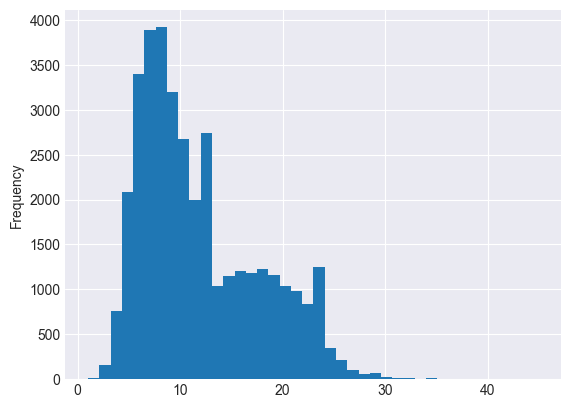

In [151]:
df["Commune"].str.len().plot.hist(bins=40);

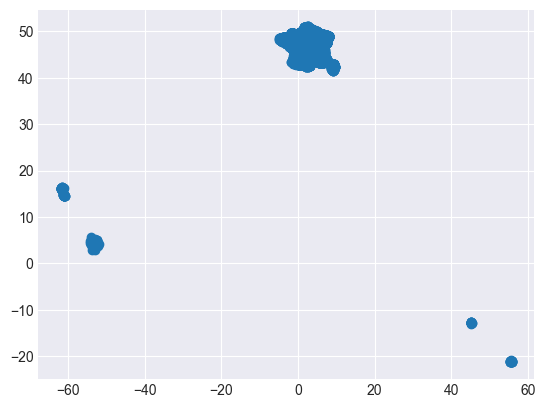

In [152]:
plt.scatter(x=df["Longitude"], y=df["Latitude"]);

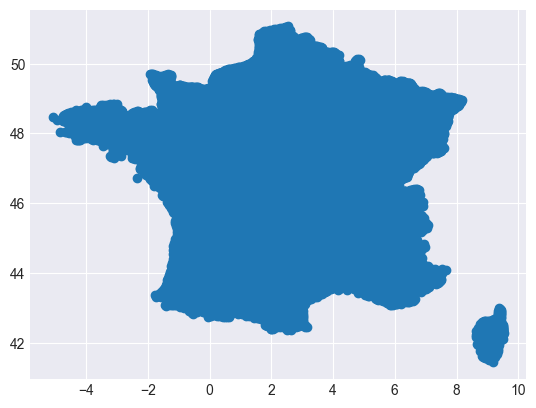

In [153]:
metro = df.loc[df["Latitude"]>40]
plt.scatter(x=metro["Longitude"], y=metro["Latitude"]);

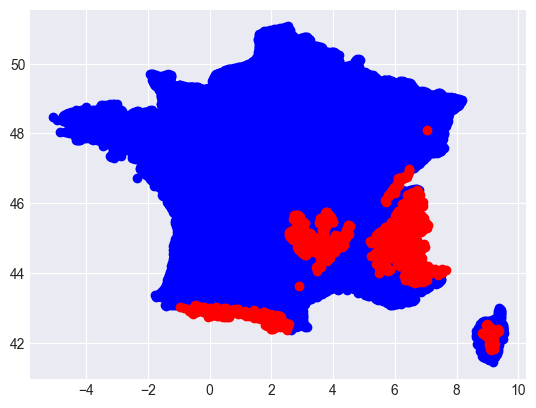

In [156]:
metro1 = metro.loc[metro["Altitude Moyenne"]<=1000]
plt.scatter(x=metro1["Longitude"], y=metro1["Latitude"], c="b");
metro2 = metro.loc[metro["Altitude Moyenne"]>1000]
plt.scatter(x=metro2["Longitude"], y=metro2["Latitude"], c="r");

In [162]:
def show(mot1, mot2):
    plt.scatter(x=metro["Longitude"], y=metro["Latitude"], c="lightgrey")
    sel = selection(mot1, mot2)
    plt.scatter(x=sel["Longitude"], y=sel["Latitude"], c="lightgreen", s=5)

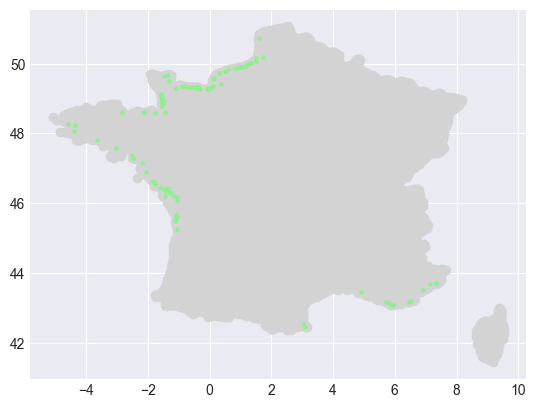

In [167]:
show("SUR", "MER")

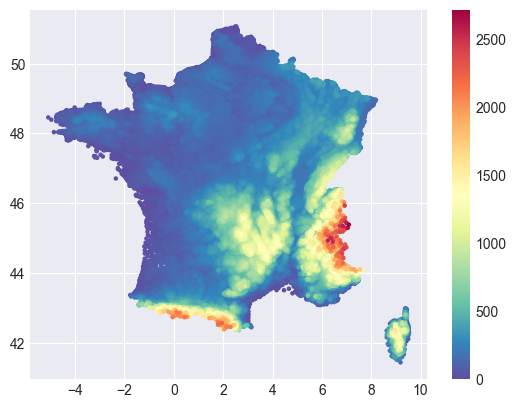

In [171]:
metro = metro.sort_values("Altitude Moyenne")
plt.scatter(x=metro["Longitude"], y=metro["Latitude"], c=metro["Altitude Moyenne"], cmap="Spectral_r", s=5)
plt.colorbar();

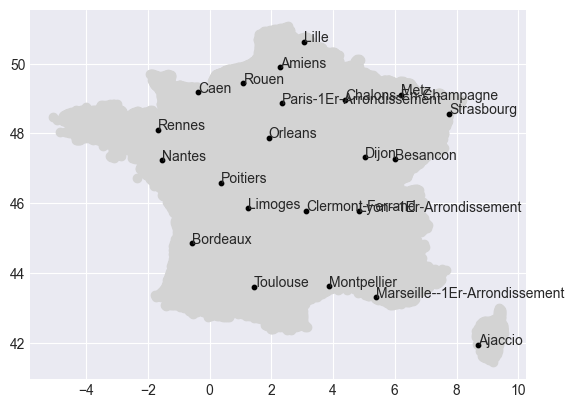

In [183]:
plt.scatter(x=metro["Longitude"], y=metro["Latitude"], c="lightgrey")
prefs = metro.loc[metro["Statut"]>="Préfecture de région"]
plt.scatter(x=prefs["Longitude"], y=prefs["Latitude"], c="k", s=10)
for x in prefs.itertuples():
    plt.annotate(x[2].title(), (x[-1], x[-2]))

In [179]:
%%time
for x in df.iterrows():
    pass

CPU times: total: 3.47 s
Wall time: 3.49 s


In [180]:
%%time
for x in df.itertuples():
    pass

CPU times: total: 188 ms
Wall time: 165 ms
